In [13]:
import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import nltk
from nltk.corpus import stopwords
from string import punctuation
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
from string import punctuation
custom = stop_words+list(punctuation)
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Arunabh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Arunabh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Arunabh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [15]:
import os
os.getcwd()
df = pd.read_pickle("first_pickle.pkl")

In [16]:
df = df[["Consumer complaint narrative"]]
df = df.dropna()
df = df[:10]

In [17]:
df.columns = ["text"]

In [18]:
df.isnull().sum()

text    0
dtype: int64

In [19]:
df

,text
1,I have outdated information on my credit repor...
2,I purchased a new car on XXXX XXXX. The car de...
7,An account on my credit report has a mistaken ...
12,This company refuses to provide me verificatio...
16,This complaint is in regards to Square Two Fin...
25,Started the refinance of home mortgage process...
26,"In XXXX, I and my ex-husband applied for a ref..."
28,I have disputed several accounts on my credit ...
29,Mortgage was transferred to Nationstar as of X...
36,"Was a happy XXXX card member for years, in lat..."


In [20]:
text = df["text"].tolist()

In [21]:
text = [my_tokenizer(s) for s in text]

In [22]:
text

[['outdated',
  'information',
  'credit',
  'report',
  'previously',
  'disputed',
  'ha',
  'yet',
  'removed',
  'information',
  'seven',
  'year',
  'old',
  'doe',
  'meet',
  'credit',
  'reporting',
  'requirement'],
 ['purchased',
  'new',
  'car',
  'xxxx',
  'xxxx',
  'car',
  'dealer',
  'called',
  'citizen',
  'bank',
  'get',
  'day',
  'payoff',
  'loan',
  'good',
  'till',
  'xxxx',
  'xxxx',
  'dealer',
  'sent',
  'check',
  'next',
  'day',
  'balanced',
  'checkbook',
  'xxxx',
  'xxxx',
  'noticed',
  'citizen',
  'bank',
  'taken',
  'automatic',
  'payment',
  'checking',
  'account',
  'xxxx',
  'xxxx',
  'xxxx',
  'bank',
  'called',
  'citizen',
  'stated',
  'close',
  'loan',
  'xxxx',
  'xxxx',
  'stating',
  'receive',
  'check',
  'xxxx',
  'xxxx',
  'told',
  'believe',
  'check',
  'took',
  'long',
  'arrive',
  'xxxx',
  'told',
  'check',
  'wa',
  'issued',
  'amount',
  'overpaid',
  'deducted',
  'additional',
  'interest',
  'today',
  'xxxx',

In [23]:
import gensim
from gensim.corpora import dictionary
from gensim import corpora
from pprint import pprint

In [24]:
id2word = corpora.Dictionary(text)

In [26]:
print (id2word)

Dictionary(442 unique tokens: ['credit', 'disputed', 'doe', 'ha', 'information']...)


In [27]:
print (id2word.token2id)

{'credit': 0, 'disputed': 1, 'doe': 2, 'ha': 3, 'information': 4, 'meet': 5, 'old': 6, 'outdated': 7, 'previously': 8, 'removed': 9, 'report': 10, 'reporting': 11, 'requirement': 12, 'seven': 13, 'year': 14, 'yet': 15, 'account': 16, 'additional': 17, 'afraid': 18, 'amount': 19, 'another': 20, 'arrive': 21, 'asked': 22, 'automatic': 23, 'balanced': 24, 'bank': 25, 'believe': 26, 'business': 27, 'called': 28, 'car': 29, 'check': 30, 'checkbook': 31, 'checking': 32, 'citizen': 33, 'close': 34, 'consumer': 35, 'could': 36, 'dated': 37, 'day': 38, 'dealer': 39, 'deducted': 40, 'delay': 41, 'delaying': 42, 'deliberately': 43, 'earned': 44, 'ethical': 45, 'first': 46, 'full': 47, 'get': 48, 'good': 49, 'hold': 50, 'hurt': 51, 'illegal': 52, 'included': 53, 'interest': 54, 'issued': 55, 'letter': 56, 'loan': 57, 'long': 58, 'lost': 59, 'mailed': 60, 'make': 61, 'minimal': 62, 'money': 63, 'month': 64, 'named': 65, 'new': 66, 'next': 67, 'noticed': 68, 'overpaid': 69, 'paid': 70, 'payment': 71

In [28]:
mycorpus = [id2word.doc2bow(s) for s in text]

In [31]:
len(mycorpus)

10

In [39]:
mycorpus[0]

[(0, 2),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [38]:
text[0]

['outdated',
 'information',
 'credit',
 'report',
 'previously',
 'disputed',
 'ha',
 'yet',
 'removed',
 'information',
 'seven',
 'year',
 'old',
 'doe',
 'meet',
 'credit',
 'reporting',
 'requirement']

In [40]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=mycorpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=42,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [41]:
pprint(lda_model.print_topics())
doc_lda = lda_model[mycorpus]

[(0,
  '0.129*"xxxx" + 0.015*"bank" + 0.015*"check" + 0.013*"two" + 0.013*"square" '
  '+ 0.013*"financial" + 0.013*"loan" + 0.013*"citizen" + 0.011*"wa" + '
  '0.011*"number"'),
 (1,
  '0.016*"credit" + 0.016*"information" + 0.016*"debt" + 0.009*"company" + '
  '0.009*"removed" + 0.009*"year" + 0.009*"yet" + 0.009*"report" + 0.009*"ha" '
  '+ 0.009*"believe"'),
 (2,
  '0.047*"xxxx" + 0.035*"wa" + 0.019*"payment" + 0.019*"amount" + '
  '0.017*"xxxx/xxxx/xxxx" + 0.017*"refinance" + 0.014*"sent" + 0.014*"loan" + '
  '0.014*"property" + 0.012*"month"'),
 (3,
  '0.039*"letter" + 0.030*"xxxx" + 0.018*"wa" + 0.015*"interest" + '
  '0.015*"experian" + 0.012*"credit" + 0.009*"month" + 0.009*"report" + '
  '0.009*"balance" + 0.009*"charged"')]


In [42]:
print('\nPerplexity: ', lda_model.log_perplexity(mycorpus))  # a measure of how good the model is. lower the better.


Perplexity:  -5.778116843847085


In [43]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.2449333272561064


In [44]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, mycorpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.090447 -0.116880       1        1  38.981716
2      0.077301  0.121894       2        1  33.644150
3     -0.134745 -0.009667       3        1  24.239325
1     -0.033004  0.004654       4        1   3.134806, topic_info=    Category       Freq            Term      Total  loglift  logprob
56   Default  10.000000          letter  10.000000  30.0000  30.0000
107  Default  70.000000            xxxx  70.000000  29.0000  29.0000
0    Default   3.000000          credit   3.000000  28.0000  28.0000
4    Default   4.000000     information   4.000000  27.0000  27.0000
116  Default   2.000000            debt   2.000000  26.0000  26.0000
162  Default   3.000000         company   3.000000  25.0000  25.0000
290  Default   5.000000       refinance   5.000000  24.0000  24.0000
26   Default   3.000000         believe   3.000000  23.0000  23.0000
10   Default   2.000000          report   2.000000  22.0000  22.0000
123  Default   3.000000        experian   3.000000  21.0000  21.0000
3    Default   2.000000              ha   2.000000  20.0000  20.0000
339  Default   5.000000        property   5.000000  19.0000  19.0000
30   Default   5.000000           check   5.000000  18.0000  18.0000
9    Default   2.000000         removed   2.000000  17.0000  17.0000
14   Default   4.000000            year   4.000000  16.0000  16.0000
19   Default   8.000000          amount   8.000000  15.0000  15.0000
1    Default   2.000000        disputed   2.000000  14.0000  14.0000
259  Default   6.000000  xxxx/xxxx/xxxx   6.000000  13.0000  13.0000
15   Default   2.000000             yet   2.000000  12.0000  12.0000
383  Default   4.000000      nationstar   4.000000  11.0000  11.0000
204  Default   5.000000       financial   5.000000  10.0000  10.0000
240  Default   5.000000          square   5.000000   9.0000   9.0000
249  Default   5.000000             two   5.000000   8.0000   8.0000
33   Default   5.000000         citizen   5.000000   7.0000   7.0000
283  Default   4.000000        mortgage   4.000000   6.0000   6.0000
2    Default   1.000000             doe   1.000000   5.0000   5.0000
168  Default   1.000000           right   1.000000   4.0000   4.0000
165  Default   1.000000             per   1.000000   3.0000   3.0000
156  Default   1.000000      validation   1.000000   2.0000   2.0000
71   Default  10.000000         payment  10.000000   1.0000   1.0000
..       ...        ...             ...        ...      ...      ...
13    Topic4   0.262134           seven   0.811945   2.3320  -4.7401
11    Topic4   0.262129       reporting   0.811959   2.3320  -4.7401
8     Topic4   0.262120      previously   0.811983   2.3319  -4.7402
12    Topic4   0.262117     requirement   0.811990   2.3319  -4.7402
5     Topic4   0.262104            meet   0.812024   2.3318  -4.7402
7     Topic4   0.262088        outdated   0.812067   2.3317  -4.7403
116   Topic4   0.473258            debt   2.376804   1.8487  -4.1493
156   Topic4   0.262919      validation   1.489208   1.7284  -4.7371
165   Topic4   0.262999             per   1.558419   1.6833  -4.7368
2     Topic4   0.262509             doe   1.581141   1.6670  -4.7387
168   Topic4   0.262274           right   1.581818   1.6657  -4.7396
0     Topic4   0.474723          credit   3.731682   1.4007  -4.1462
1     Topic4   0.263304        disputed   2.167445   1.3546  -4.7356
15    Topic4   0.265020             yet   2.232653   1.3315  -4.7292
9     Topic4   0.265971         removed   2.299660   1.3055  -4.7256
4     Topic4   0.473777     information   4.755876   1.1562  -4.1482
10    Topic4   0.264122          report   2.844591   1.0858  -4.7325
3     Topic4   0.263689              ha   2.936805   1.0523  -4.7342
26    Topic4   0.263598         believe   3.118781   0.9918  -4.7345
162   Topic4   0.267392         company   3.793940   0.8102  -4.7202
14    Topic4   0.265620            year   4.4

In [85]:
import os

In [86]:
# mallet_path = "/Users/Arunabh/Desktop/mallet-2.0.8/bin/mallet"

In [89]:
# ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=mycorpus, num_topics=4, id2word=id2word)

In [91]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=mycorpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [93]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=mycorpus, texts=text, start=2, limit=40, step=6)

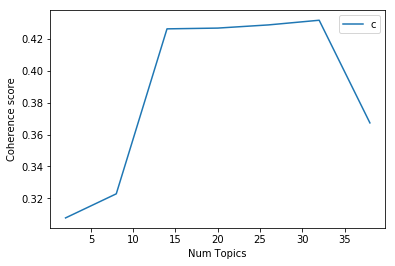

In [94]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [95]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))


Num Topics = 2  has Coherence Value of 0.3078
Num Topics = 8  has Coherence Value of 0.3228
Num Topics = 14  has Coherence Value of 0.4262
Num Topics = 20  has Coherence Value of 0.4267
Num Topics = 26  has Coherence Value of 0.4287
Num Topics = 32  has Coherence Value of 0.4316
Num Topics = 38  has Coherence Value of 0.3673


In [96]:
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.019*"xxxx" + 0.014*"bureau" + 0.012*"credit" + 0.010*"phone" + '
  '0.009*"court" + 0.009*"said" + 0.008*"verified" + 0.008*"sent" + '
  '0.008*"n\'t" + 0.007*"report"'),
 (1,
  '0.056*"xxxx" + 0.028*"credit" + 0.027*"significant" + 0.027*"score" + '
  '0.017*"account" + 0.015*"please" + 0.015*"requested" + 0.014*"sign" + '
  '0.014*"ha" + 0.014*"one"'),
 (2,
  '0.004*"closing" + 0.003*"wa" + 0.003*"account" + 0.003*"property" + '
  '0.003*"xxxx" + 0.003*"disclosure" + 0.003*"form" + 0.003*"rate" + '
  '0.003*"fixed" + 0.003*"n\'t"'),
 (3,
  '0.035*"xxxx" + 0.032*"wa" + 0.018*"credit" + 0.017*"bureau" + '
  '0.015*"closing" + 0.013*"told" + 0.012*"account" + 0.010*"navient" + '
  '0.010*"loan" + 0.009*"payment"'),
 (4,
  '0.028*"xxxx" + 0.021*"inquiry" + 0.018*"..." + 0.017*"date" + '
  '0.009*"credit" + 0.009*"account" + 0.009*"xx/xx/xxxx" + 0.006*"information" '
  '+ 0.006*"closing" + 0.006*"wa"'),
 (5,
  '0.082*"xxxx" + 0.034*"call" + 0.025*"number" + 0.024*"wa" + 0.018*"c

In [98]:
def format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=mycorpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.9845,"wa, credit, told, navient, xxxx, balance, deli...","[loan, wa, switched, navient, wa, never, told,..."
1,1,1.0,0.9156,"xxxx, credit, significant, score, account, ple...","[tried, sign, spending, monitoring, program, c..."
2,2,6.0,0.9938,"wa, payment, mortgage, would, closing, account...","[mortgage, bank, recently, investigating, way,..."
3,3,6.0,0.6695,"wa, payment, mortgage, would, closing, account...","[entire, lending, experience, citizen, bank, w..."
4,4,1.0,0.9643,"xxxx, credit, significant, score, account, ple...","[credit, score, ha, gone, xxxx, point, last, m..."
5,5,11.0,0.9700,"xxxx, account, report, back, wa, sent, bureau,...","[month, back, contacted, xxxx, regard, fraudul..."
6,6,10.0,0.9834,"xxxx, date, ..., inquiry, xx/xx/xxxx, credit, ...","[victim, fraud, file, federal, trade, commissi..."
7,7,13.0,0.9923,"xxxx, bureau, credit, n't, letter, wa, closing...","[disputing, bankruptcy, credit, report, writte..."
8,8,5.0,0.9875,"xxxx, call, number, wa, called, company, told,...","[today, received, phone, call, number, listed,..."
9,9,5.0,0.9888,"xxxx, call, number, wa, called, company, told,...","[gotten, call, resource, looking, person, auth..."


In [99]:
def format_topics_sentences(ldamodel=None, corpus=mycorpus, texts=text):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=mycorpus, texts=text)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.9983,"xxxx, wa, credit, told, bureau, call, ..., pay...","[loan, wa, switched, navient, wa, never, told,..."
1,1,0.0,0.9799,"account, sign, one, program, tried, monitoring...","[tried, sign, spending, monitoring, program, c..."
2,2,2.0,0.9993,"xxxx, wa, credit, told, bureau, call, ..., pay...","[mortgage, bank, recently, investigating, way,..."
3,3,1.0,0.9994,"closing, wa, account, xxxx, fixed, rate, form,...","[entire, lending, experience, citizen, bank, w..."
4,4,2.0,0.9961,"xxxx, wa, credit, told, bureau, call, ..., pay...","[credit, score, ha, gone, xxxx, point, last, m..."
5,5,2.0,0.9967,"xxxx, wa, credit, told, bureau, call, ..., pay...","[month, back, contacted, xxxx, regard, fraudul..."
6,6,2.0,0.9982,"xxxx, wa, credit, told, bureau, call, ..., pay...","[victim, fraud, file, federal, trade, commissi..."
7,7,2.0,0.9992,"xxxx, wa, credit, told, bureau, call, ..., pay...","[disputing, bankruptcy, credit, report, writte..."
8,8,3.0,0.9972,"xxxx, wa, number, company, payment, call, toda...","[today, received, phone, call, number, listed,..."
9,9,2.0,0.9988,"xxxx, wa, credit, told, bureau, call, ..., pay...","[gotten, call, resource, looking, person, auth..."


In [100]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9799,"account, sign, one, program, tried, monitoring, access, spending, let, capital","[tried, sign, spending, monitoring, program, capital, one, let, access, account]"
1,1.0,0.9994,"closing, wa, account, xxxx, fixed, rate, form, bank, property, would","[entire, lending, experience, citizen, bank, wa, terrible, lender, kept, pushing, xxxx, arm, con..."
2,2.0,0.9993,"xxxx, wa, credit, told, bureau, call, ..., payment, report, phone","[mortgage, bank, recently, investigating, way, pay, mortgage, faster, came, across, biweekly, mo..."
3,3.0,0.9972,"xxxx, wa, number, company, payment, call, today, xxxx/xxxx/xxxx, fcc, spoofed","[today, received, phone, call, number, listed, xxxx, xxxx, xxxx, xxxx/xxxx/xxxx, caller, wa, xxx..."


  Using cached https://files.pythonhosted.org/packages/c7/07/e43a7094a58e602e85a09494d9b99e7b5d71ca4789852287386e21e74c33/wordcloud-1.5.0-cp37-cp37m-macosx_10_6_x86_64.whl


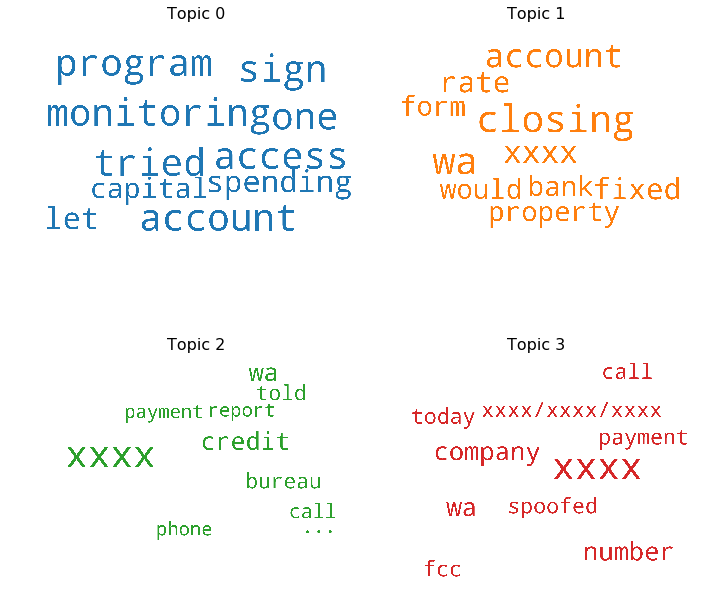

In [104]:
!pip install wordcloud
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

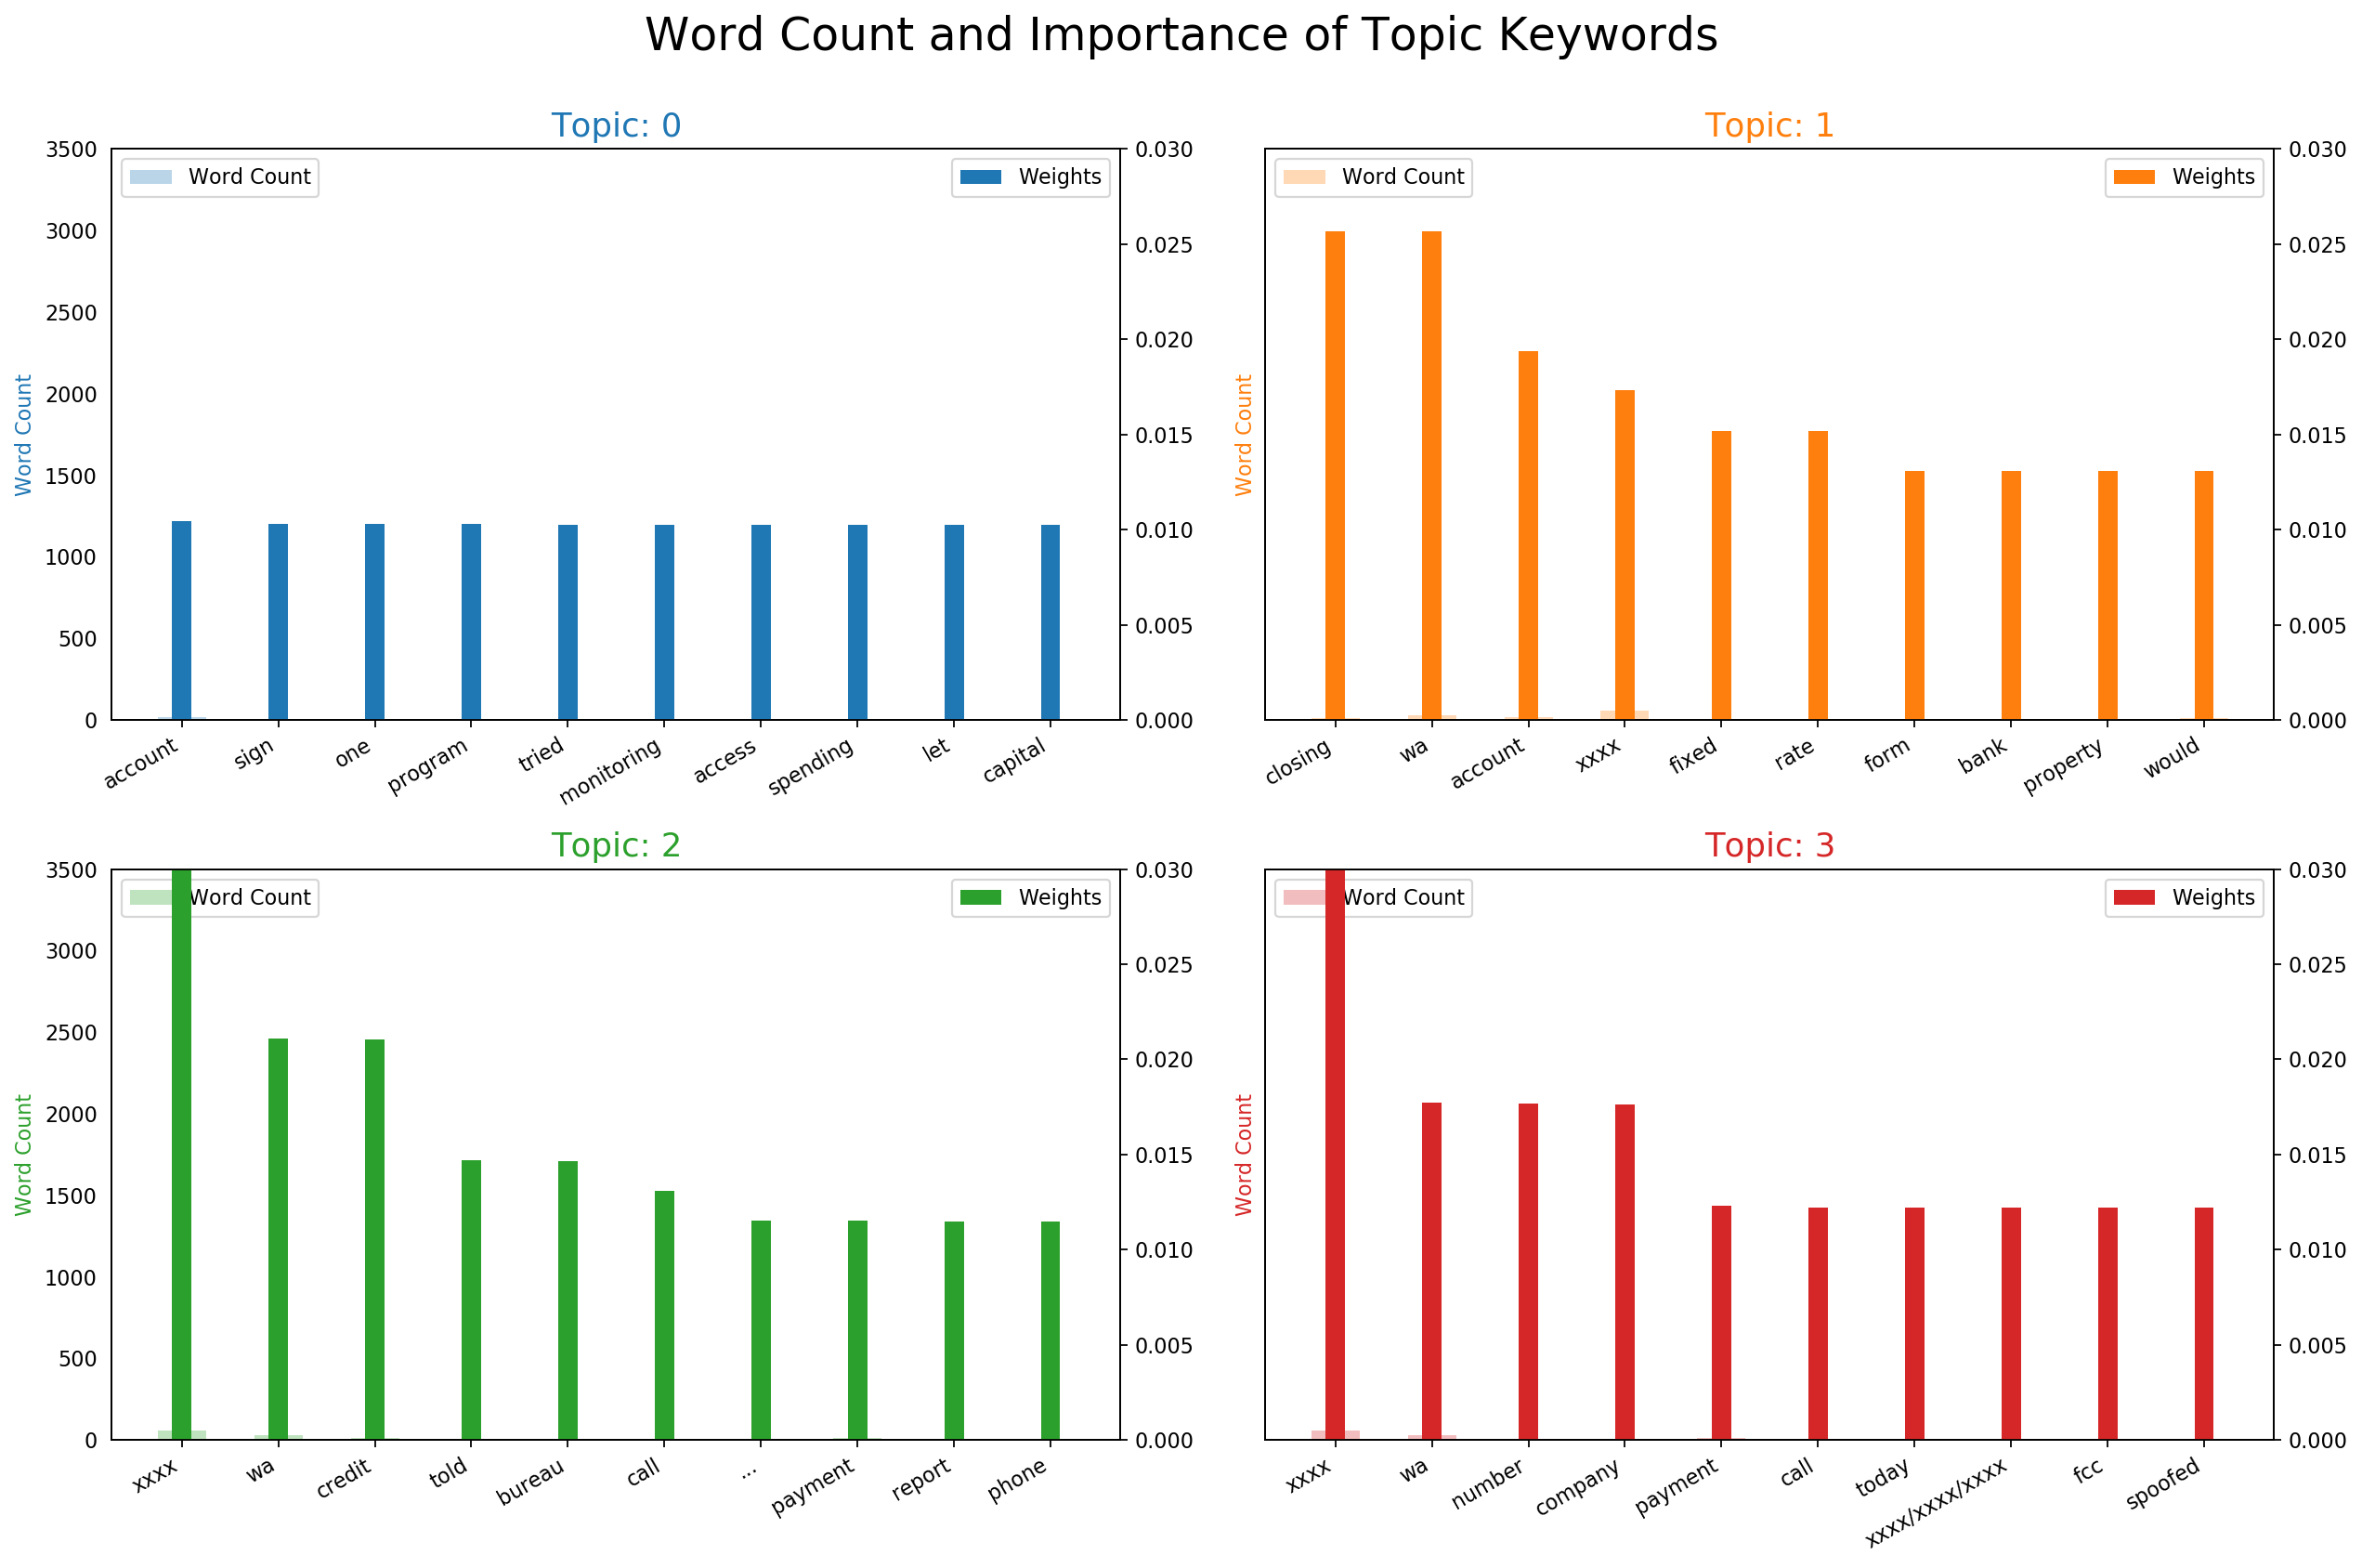

In [106]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in text for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

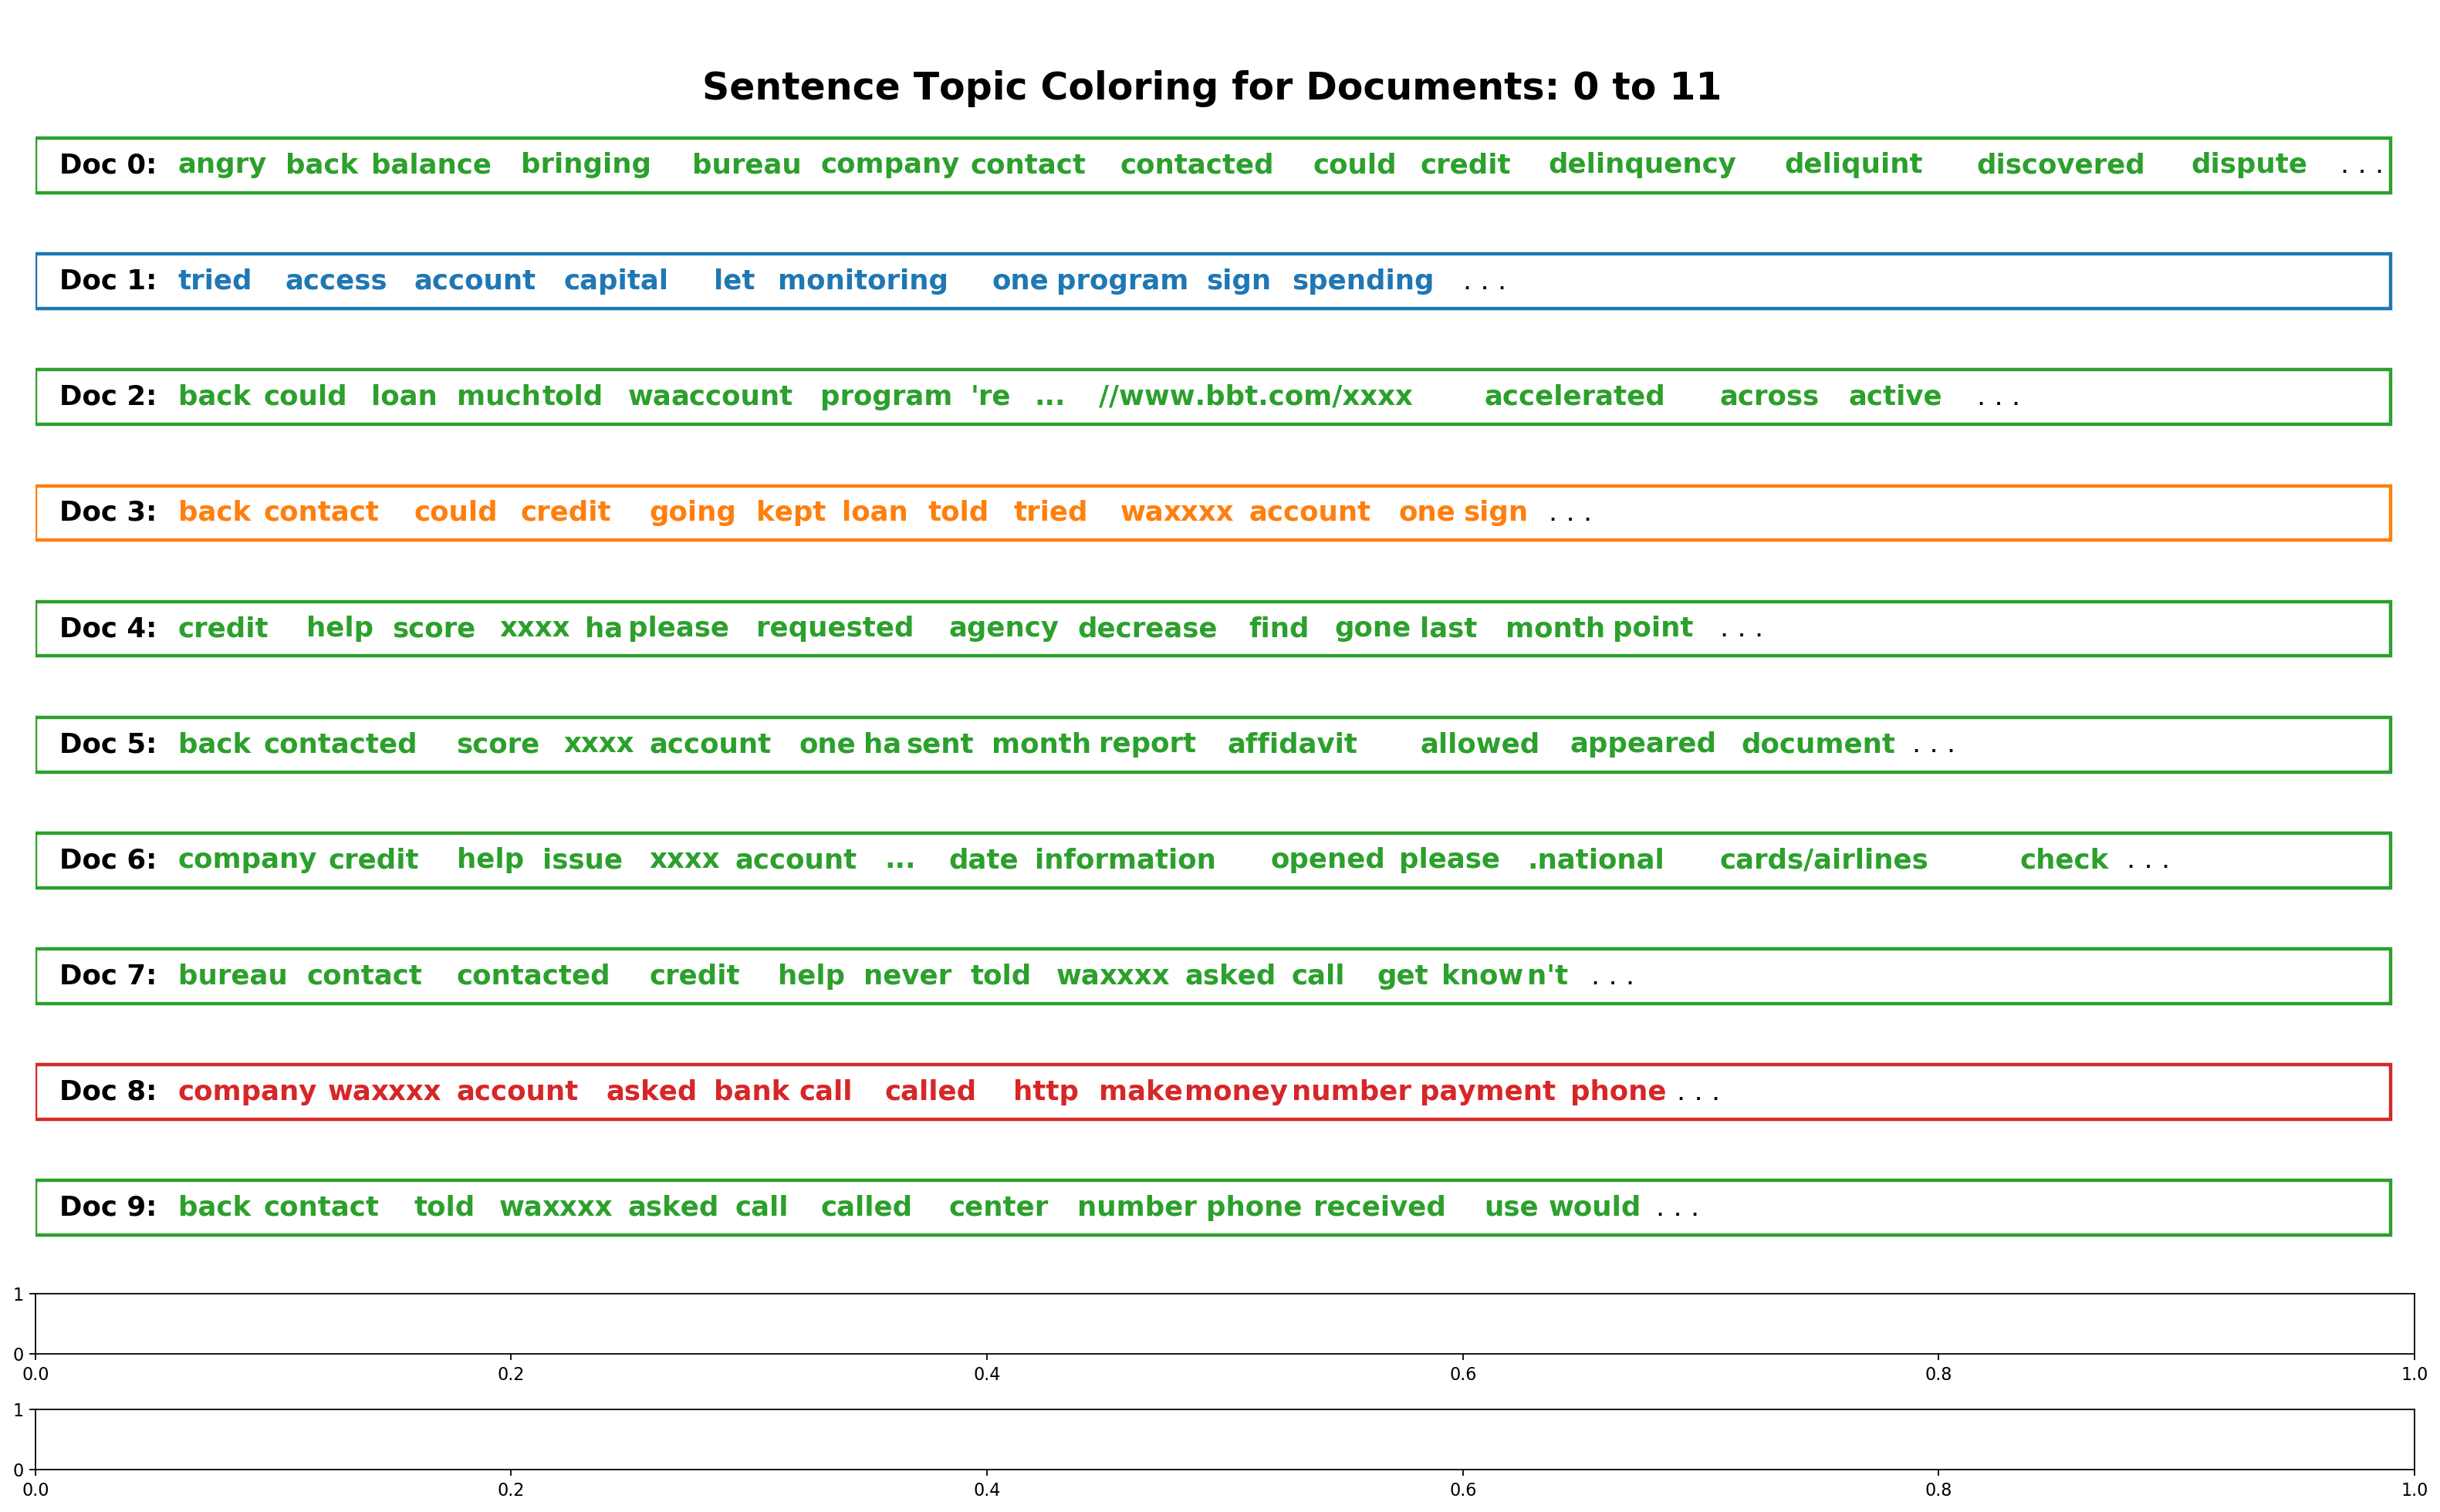

In [109]:
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=mycorpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            try:
                corp_cur = corp[i-1] 
                topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
                word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
                ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                        fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

                # Draw Rectange
                topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
                ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                       color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

                word_pos = 0.06
                for j, (word, topics) in enumerate(word_dominanttopic):
                    if j < 14:
                        ax.text(word_pos, 0.5, word,
                                horizontalalignment='left',
                                verticalalignment='center',
                                fontsize=16, color=mycolors[topics],
                                transform=ax.transAxes, fontweight=700)
                        word_pos += .009 * len(word)  # to move the word for the next iter
                        ax.axis('off')
                ax.text(word_pos, 0.5, '. . .',
                        horizontalalignment='left',
                        verticalalignment='center',
                        fontsize=16, color='black',
                        transform=ax.transAxes)       
            except:pass
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [111]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[mycorpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 9 nearest neighbors...
[t-SNE] Indexed 10 samples in 0.000s...
[t-SNE] Computed neighbors for 10 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 10 / 10
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.099380
[t-SNE] KL divergence after 1000 iterations: 0.227001


Loading BokehJS ...

In [112]:
import nltk

In [113]:
import urllib
from gensim.models import Word2Vec

In [114]:
import bs4 as bs

In [115]:
import re

In [116]:
source = urllib.request.urlopen("https://en.wikipedia.org/wiki/Global_warming")

In [117]:
soup = bs.BeautifulSoup(source, "lxml")

In [128]:
text = ""
for x in soup.find_all("p"):
    text+=x.text

In [129]:
text = nltk.sent_tokenize(text)

In [132]:
len(text)

311

In [141]:
def my_tokenizer(s):
    s = s.lower()
    tokens = nltk.tokenize.word_tokenize(s)
    tokens = [t for t in tokens if len(t)>2] #remove words lesser than 2 in length
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] #lemmatize words
    tokens = [t for t in tokens if t not in custom] #remove stopwords and punctuation
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove digits
    return tokens

In [142]:
text = [my_tokenizer(s) for s in text]

In [143]:
# text = [" ".join(x) for x in text]

In [144]:
len(text)

311

In [145]:
text[:4]

[['global',
  'warming',
  'long-term',
  'rise',
  'average',
  'temperature',
  'earth',
  'climate',
  'system',
  'aspect',
  'current',
  'climate',
  'change',
  'shown',
  'temperature',
  'measurement',
  'multiple',
  'effect',
  'warming'],
 ['term',
  'commonly',
  'refers',
  'mainly',
  'human-caused',
  'increase',
  'global',
  'surface',
  'temperature',
  'projected',
  'continuation'],
 ['context',
  'term',
  'global',
  'warming',
  'climate',
  'change',
  'often',
  'used',
  'interchangeably',
  'climate',
  'change',
  'includes',
  'global',
  'warming',
  'effect',
  'change',
  'precipitation',
  'impact',
  'differ',
  'region'],
 ['prehistoric',
  'period',
  'global',
  'warming',
  'observed',
  'change',
  'since',
  'century',
  'much',
  'greater',
  'seen',
  'previous',
  'record',
  'covering',
  'decade',
  'thousand',
  'year']]

In [146]:
model = Word2Vec(text, min_count = 1)

In [149]:
words = model.wv.vocab

In [150]:
words

{'global': <gensim.models.keyedvectors.Vocab at 0x1a4940add8>,
 'warming': <gensim.models.keyedvectors.Vocab at 0x1a3ce47ef0>,
 'long-term': <gensim.models.keyedvectors.Vocab at 0x1a3ac2d208>,
 'rise': <gensim.models.keyedvectors.Vocab at 0x1a5457cc88>,
 'average': <gensim.models.keyedvectors.Vocab at 0x1a5457c048>,
 'temperature': <gensim.models.keyedvectors.Vocab at 0x1a5457ca58>,
 'earth': <gensim.models.keyedvectors.Vocab at 0x1a5457c908>,
 'climate': <gensim.models.keyedvectors.Vocab at 0x1a5457ce10>,
 'system': <gensim.models.keyedvectors.Vocab at 0x1a5457c5f8>,
 'aspect': <gensim.models.keyedvectors.Vocab at 0x1a5457c4e0>,
 'current': <gensim.models.keyedvectors.Vocab at 0x1a5457ce48>,
 'change': <gensim.models.keyedvectors.Vocab at 0x1a5457cf60>,
 'shown': <gensim.models.keyedvectors.Vocab at 0x1a5457c518>,
 'measurement': <gensim.models.keyedvectors.Vocab at 0x1a5457c978>,
 'multiple': <gensim.models.keyedvectors.Vocab at 0x1a5457cdd8>,
 'effect': <gensim.models.keyedvectors.V

In [151]:
vector = model.wv["global"]

In [153]:
vector.shape

(100,)

In [157]:
similar = model.wv.most_similar("global")

In [158]:
similar

[('change', 0.418139785528183),
 ('country', 0.3693532645702362),
 ('emission', 0.35578465461730957),
 ('low', 0.3346283435821533),
 ('temperature', 0.3342539966106415),
 ('due', 0.32681384682655334),
 ('million', 0.31735938787460327),
 ('nucleus', 0.31666266918182373),
 ('warming', 0.31130027770996094),
 ('fossil', 0.31002724170684814)]